#Install dependencies

In [1]:
!pip install scikit-learn-intelex

In [2]:
!pip install scikit-cuda

#Import Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from tqdm import tqdm

#Loading Dataset

In [4]:
# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [5]:
# Merge DataFrames on the '[PassengerId]' column
test_data = pd.merge(test_data, gender_submission, on='PassengerId', how='inner')

In [7]:
train_data.shape

(891, 12)

In [8]:
# Explore the data
print("Train Data Info:")
print(train_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
test_data.shape

(418, 12)

In [10]:
# Explore the data
print("Test Data Info:")
print(test_data.info())

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB
None


In [11]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Preproceessing

In [13]:
# Handle missing values
train_data = train_data.dropna(subset=['Age', 'Embarked'])
test_data = test_data.dropna(subset=['Age', 'Embarked'])

In [14]:
# Handle missing values in 'Cabin'
imputer_cabin = SimpleImputer(strategy='constant', fill_value='Unknown')
train_data['Cabin'] = imputer_cabin.fit_transform(train_data[['Cabin']])
test_data['Cabin'] = imputer_cabin.transform(test_data[['Cabin']])

In [15]:
train_data.shape, test_data.shape

((712, 12), (332, 12))

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [17]:
# Feature encoding
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [18]:
# Feature encoding for 'Cabin'
train_data['CabinKnown'] = train_data['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)
test_data['CabinKnown'] = test_data['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)

# Drop the original 'Cabin' column
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0


In [20]:
unique_age_values = train_data['Embarked'].unique()
print("Unique Age Values:", unique_age_values)

Unique Age Values: ['S' 'C' 'Q']


In [21]:
# Binning (example: age binning)
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bins, labels=labels)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,19-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,36-50
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,19-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1,19-35
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,19-35


In [23]:
# Drop the original 'Cabin' column
train_data = train_data.drop(['Age'], axis=1)
test_data = test_data.drop(['Age'], axis=1)

In [24]:
# Feature normalization/standardization (example: fare)
scaler = StandardScaler()
train_data[['Fare']] = scaler.fit_transform(train_data[['Fare']])
test_data[['Fare']] = scaler.transform(test_data[['Fare']])

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,-0.516380,S,0,19-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,0.694046,C,1,36-50
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,-0.503620,S,0,19-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,0.350326,S,1,19-35
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,-0.501257,S,0,19-35


In [26]:
# Categorical feature encoding (example: Embarked)
train_data = pd.get_dummies(train_data, columns=['Embarked', 'AgeGroup'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked', 'AgeGroup'], drop_first=True)

get ready for trainging

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,CabinKnown,Embarked_Q,Embarked_S,AgeGroup_19-35,AgeGroup_36-50,AgeGroup_51+
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,-0.516380,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,0.694046,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,-0.503620,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,0.350326,1,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,-0.501257,0,0,1,1,0,0


In [28]:
test_data.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Survived,CabinKnown,Embarked_Q,Embarked_S,AgeGroup_19-35,AgeGroup_36-50,AgeGroup_51+
0,892,3,"Kelly, Mr. James",1,0,0,330911,-0.505431,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,-0.521106,1,0,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,-0.470304,0,0,1,0,0,0,1
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,-0.489679,0,0,0,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,-0.421156,1,0,0,1,1,0,0


In [29]:
train_data.shape, test_data.shape

((712, 15), (332, 15))

In [41]:
test_data = test_data.dropna()


In [42]:
X_train = train_data.drop(['PassengerId', 'Survived', 'Name','SibSp','Parch', 'Ticket', 'CabinKnown'], axis=1)
X_test = test_data.drop(['PassengerId','Survived', 'Name','SibSp','Parch', 'Ticket', 'CabinKnown'], axis=1)
y_train = train_data["Survived"]
y_test = test_data["Survived"]


In [43]:
X_test.shape, y_test.shape

((331, 8), (331,))

In [36]:
X_test.head()

,Pclass,Sex,Fare,Embarked_Q,Embarked_S,AgeGroup_19-35,AgeGroup_36-50,AgeGroup_51+
0,3,1,-0.505431,1,0,1,0,0
1,3,0,-0.521106,0,1,0,1,0
2,2,1,-0.470304,1,0,0,0,1
3,3,1,-0.489679,0,1,1,0,0
4,3,0,-0.421156,0,1,1,0,0


In [37]:
unique_age_values = train_data['Pclass'].unique()
print("Unique Pclass Values:", unique_age_values)

Unique Pclass Values: [3 1 2]


In [53]:
C_values = [0.001,0.01,0.1, 1.0, 10.0]

results_train = {'C': [], 'Precision': [], 'Recall': [], 'Accuracy': [], 'AUC': []}
results_test = {'C': [], 'Precision': [], 'Recall': [], 'Accuracy': [], 'AUC': []}


#10-fold cross validation

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import numpy as np

for C in tqdm(C_values, desc="Processing C values"):

    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    auc_scores = []

    # Implement 10-fold cross-validation
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model = SVC(C=C, kernel='linear', probability=True, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        # Predict on the validation set
        y_pred_val = model.predict(X_val_fold)

        # Calculate performance metrics for this fold
        precision_scores.append(precision_score(y_val_fold, y_pred_val, zero_division=1))
        recall_scores.append(recall_score(y_val_fold, y_pred_val))
        accuracy_scores.append(accuracy_score(y_val_fold, y_pred_val))
        auc_scores.append(roc_auc_score(y_val_fold, model.predict_proba(X_val_fold)[:, 1]))

    # Average the metrics over the folds
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_accuracy = np.mean(accuracy_scores)
    avg_auc = np.mean(auc_scores)

    # Save results for this C value
    results_train['C'].append(C)
    results_train['Precision'].append(avg_precision)
    results_train['Recall'].append(avg_recall)
    results_train['Accuracy'].append(avg_accuracy)
    results_train['AUC'].append(avg_auc)


# Find the best C value based on cross-validation
best_C = results_train['C'][np.argmax(results_train['Accuracy'])]
# Train the best model on the entire training set
best_model = SVC(C=best_C, kernel='linear', probability=True, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_test = best_model.predict(X_test)

precision_test = precision_score(y_test, y_pred_test, zero_division=1)
recall_test = recall_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Save results for best C value on the test set
results_test['C'].append(best_C)
results_test['Precision'].append(precision_test)
results_test['Recall'].append(recall_test)
results_test['Accuracy'].append(accuracy_test)
results_test['AUC'].append(auc_test)

Processing C values: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


In [59]:
#Result of the validation for best-c
print("Precision Valid: ",results_train['Precision'][np.argmax(results_train['Accuracy'])])
print("Recall Valid: ",results_train['Recall'][np.argmax(results_train['Accuracy'])])
print("Accuracy Valid: ",results_train['Accuracy'][np.argmax(results_train['Accuracy'])])
print("AUC Valid: ",results_train['AUC'][np.argmax(results_train['Accuracy'])])
print("best_C: ", best_C)

Precision Valid:  0.8617670122275385
Recall Valid:  0.5695812807881774
Accuracy Valid:  0.7879107981220658
AUC Valid:  0.8349300225302632
best_C:  0.01


plot

In [56]:
# Results on training set
results_train_df = pd.DataFrame(results_train)
print("\nResults on Training Set:")
print(results_train_df)


Results on Training Set:
        C  Precision    Recall  Accuracy       AUC
0   0.001   1.000000  0.010468  0.599707  0.798085
1   0.010   0.861767  0.569581  0.787911  0.834930
2   0.100   0.761081  0.676724  0.779382  0.844615
3   1.000   0.761081  0.676724  0.779382  0.834201
4  10.000   0.761081  0.676724  0.779382  0.832553


In [57]:
# Results on test set
results_test_df = pd.DataFrame(results_test)
print("\nResults on Test Set:")
print(results_test_df)



Results on Test Set:
      C  Precision    Recall  Accuracy       AUC
0  0.01   0.878788  0.685039    0.8429  0.971476


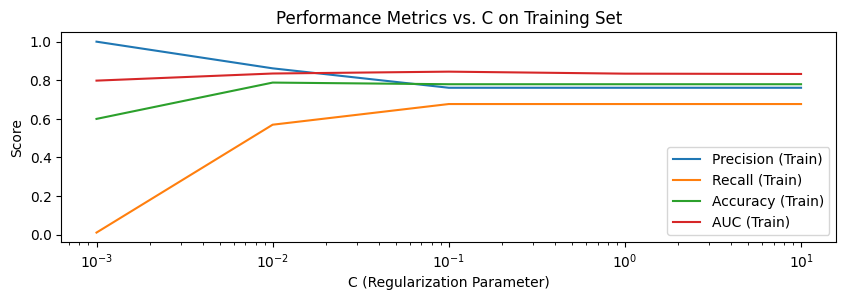

In [58]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(results_train_df['C'], results_train_df['Precision'], label='Precision (Train)')
plt.plot(results_train_df['C'], results_train_df['Recall'], label='Recall (Train)')
plt.plot(results_train_df['C'], results_train_df['Accuracy'], label='Accuracy (Train)')
plt.plot(results_train_df['C'], results_train_df['AUC'], label='AUC (Train)')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. C on Training Set')
plt.legend()

#3 way hold out

In [60]:
# 3-Way Holdout
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(['PassengerId', 'Survived', 'Name','SibSp','Parch', 'Ticket', 'CabinKnown'], axis=1),
                                                    train_data['Survived'], test_size=0.4, random_state=42, stratify=train_data['Survived'])

In [61]:
X_train.shape, X_val.shape

((427, 8), (285, 8))

In [65]:
C_values = [0.0001,0.001,0.01]  # Example values, replace with your choices

results_train = {'C': [], 'Precision': [], 'Recall': [], 'Accuracy': [], 'AUC': []}
results_test = {'C': [], 'Precision': [], 'Recall': [], 'Accuracy': [], 'AUC': []}


In [66]:

for C in tqdm(C_values, desc="Processing C values"):
    # Training on the training set
    model = SVC(C=C, kernel='linear', probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_pred_val = model.predict(X_val)
    precision_val = precision_score(y_val, y_pred_val, zero_division=1)
    recall_val = recall_score(y_val, y_pred_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    auc_val = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    results_train['C'].append(C)
    results_train['Precision'].append(precision_val)
    results_train['Recall'].append(recall_val)
    results_train['Accuracy'].append(accuracy_val)
    results_train['AUC'].append(auc_val)


best_C = results_train['C'][np.argmax(results_train['Accuracy'])]

# Train the best model on the entire training set
best_model = SVC(C=best_C, kernel='linear', probability=True, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_test = best_model.predict(X_test)

precision_test = precision_score(y_test, y_pred_test, zero_division=1)
recall_test = recall_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Save results for this C value on the test set
results_test['C'].append(C)
results_test['Precision'].append(precision_test)
results_test['Recall'].append(recall_test)
results_test['Accuracy'].append(accuracy_test)
results_test['AUC'].append(auc_test)


Processing C values: 100%|██████████| 3/3 [00:00<00:00, 28.07it/s]


In [69]:
print("best_C: ", best_C)
print("Precision train: ",results_train['Precision'][np.argmax(results_train['Accuracy'])])
print("Recall train: ",results_train['Recall'][np.argmax(results_train['Accuracy'])])
print("Accuracy train: ",results_train['Accuracy'][np.argmax(results_train['Accuracy'])])
print("AUC train: ",results_train['AUC'][np.argmax(results_train['Accuracy'])])

best_C:  0.01
Precision train:  0.6730769230769231
Recall train:  0.6086956521739131
Accuracy train:  0.7228070175438597
AUC train:  0.7942966751918158


In [70]:
# Results on validation set
results_train_df = pd.DataFrame(results_train)
print("\nResults on Validation Set:")
print(results_train_df)


Results on Validation Set:
        C  Precision    Recall  Accuracy       AUC
0  0.0001   1.000000  0.000000  0.596491  0.753274
1  0.0010   1.000000  0.000000  0.596491  0.754143
2  0.0100   0.673077  0.608696  0.722807  0.794297


In [71]:
# Results on test set
results_test_df = pd.DataFrame(results_test)
print("\nResults on Test Set:")
print(results_test_df)


Results on Test Set:
      C  Precision    Recall  Accuracy       AUC
0  0.01   0.611111  0.606299  0.700906  0.870735


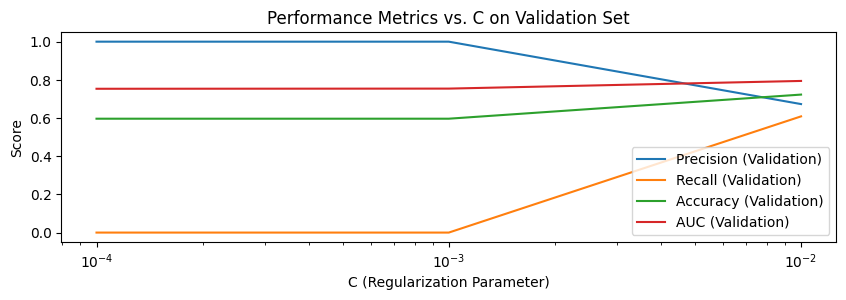

In [72]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(results_train_df['C'], results_train_df['Precision'], label='Precision (Validation)')
plt.plot(results_train_df['C'], results_train_df['Recall'], label='Recall (Validation)')
plt.plot(results_train_df['C'], results_train_df['Accuracy'], label='Accuracy (Validation)')
plt.plot(results_train_df['C'], results_train_df['AUC'], label='AUC (Validation)')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. C on Validation Set')
plt.legend()